### Downloaded the Diabetes.csv DataSet and read it using Python Pandas Library

In [65]:
import numpy as np
import pandas as pd

data=pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Set the seed and sample size of the sample data.

### Printed the sample data.

In [66]:
np.random.seed(42)

sample_size=25
sample_data=data.sample(n=sample_size)

sample_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
204,6,103,72,32,190,37.7,0.324,55,0
97,1,71,48,18,76,20.4,0.323,22,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0
148,5,147,78,0,0,33.7,0.218,65,0


### With the help of sample data we have performed the necessary statistics such as mean and max on **Glucose**

In [67]:
sample_data_stats=sample_data['Glucose'].describe()

data_stats=data['Glucose'].describe()

print('Mean Glucose of:\n')
print('Original Data:',data_stats['mean'],"\n")
print('Sample Data:',sample_data_stats['mean'],'\n')

print('Highest Glucose of:\n')
print('Original Data:',data_stats['max'],"\n")
print('Sample Data:',sample_data_stats['max'],'\n')

Mean Glucose of:

Original Data: 120.89453125 

Sample Data: 116.64 

Highest Glucose of:

Original Data: 199.0 

Sample Data: 183.0 



### With the help of Python matplotlib library we have compared the population statistics and sample data statistics.

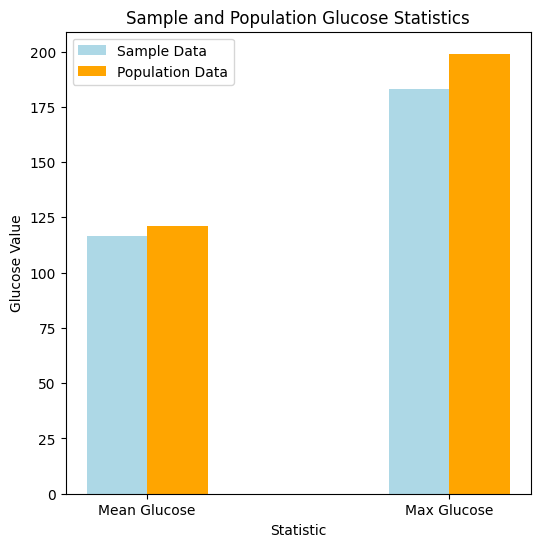

In [74]:
import matplotlib.pyplot as plt

labels = ['Mean Glucose', 'Max Glucose']
sample_values = [sample_data_stats['mean'], sample_data_stats['max']]
population_values = [data_stats['mean'], data_stats['max']]

plt.figure(figsize=(6, 6))

x = np.arange(len(labels))
width = 0.2

plt.bar(x - width/2, [sample_data_stats['mean'], sample_data_stats['max']], width, label='Sample Data', color='lightblue')
plt.bar(x + width/2, [data_stats['mean'], data_stats['max']], width, label='Population Data', color='orange')
plt.xticks(x, labels)

plt.xlabel('Statistic')
plt.ylabel('Glucose Value')
plt.title('Sample and Population Glucose Statistics')
plt.legend()

### For the same sample data we have performed necessary statistics for **BMI** and compared it with population data.

In [69]:
sample_data_bmi_stats = sample_data['BMI'].describe(percentiles=[.98])['98%']

data_bmi_stats = data['BMI'].describe(percentiles=[.98])['98%']

print('Sample Data 98th Percentile:',sample_data_bmi_stats)
print('Original Data 98th Percentile:',data_bmi_stats)

Sample Data 98th Percentile: 40.248
Original Data 98th Percentile: 47.52599999999996


### Showed the difference between both the values with the help of bar graph.

Text(0.5, 1.0, '98th Percentile BMI between Sample and Population')

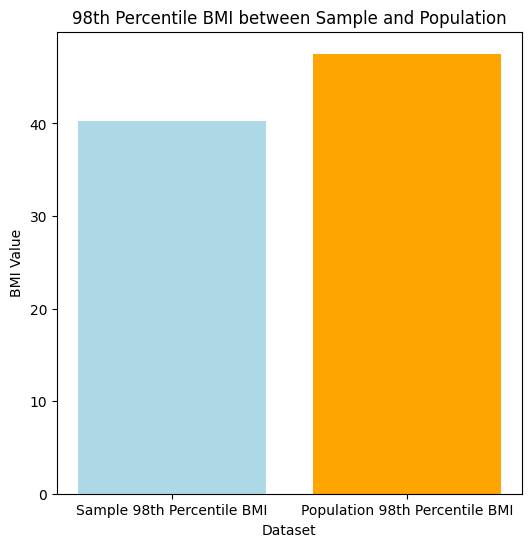

In [75]:
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [sample_data_bmi_stats, data_bmi_stats]

plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['lightblue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('BMI Value')
plt.title('98th Percentile BMI between Sample and Population')

### Set the bootstrap sample observation to 150 and performed the operation for 500 times and added the attribute `replace = True` to allow duplicates.

### Then find their average mean, standard deviation and 98th percentile for the bootstrap sample of 500 and population data statistics.

In [71]:
bootstrap_sample_size=150

bootstrap_sample_mean=[]
bootstrap_sample_std=[]
bootstrap_sample_percentile=[]

for i in range(1,501):
  bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)

  bootstrap_sample_mean.append(bootstrap_sample.describe()['mean'])
  bootstrap_sample_std.append(bootstrap_sample.describe()['std'])
  bootstrap_sample_percentile.append(bootstrap_sample.describe(percentiles=[.98])['98%'])

average_mean=np.mean(bootstrap_sample_mean)
average_std=np.mean(bootstrap_sample_std)
average_percentile=np.mean(bootstrap_sample_percentile)

print('Average Mean of Bootstrap Sample of Blood Pressure:',average_mean)
print('Average Standard Deviation of Bootstrap Sample of Blood Pressure:',average_std)
print('Average Percentile of Bootstrap Sample of Blood Pressure:',average_percentile)

print('\nMean of Population of Blood Pressure:',data['BloodPressure'].describe()['mean'])
print('Standard Deviation of Population of Blood Pressure:',data['BloodPressure'].describe()['std'])
print('Percentile of Population of Blood Pressure:',data['BloodPressure'].describe(percentiles=[.98])['98%'])


Average Mean of Bootstrap Sample of Blood Pressure: 69.29656
Average Standard Deviation of Bootstrap Sample of Blood Pressure: 18.44862681276505
Average Percentile of Bootstrap Sample of Blood Pressure: 94.76168

Mean of Population of Blood Pressure: 69.10546875
Standard Deviation of Population of Blood Pressure: 19.355807170644777
Percentile of Population of Blood Pressure: 99.31999999999994


### Compared the difference between both with the help of bar chart.

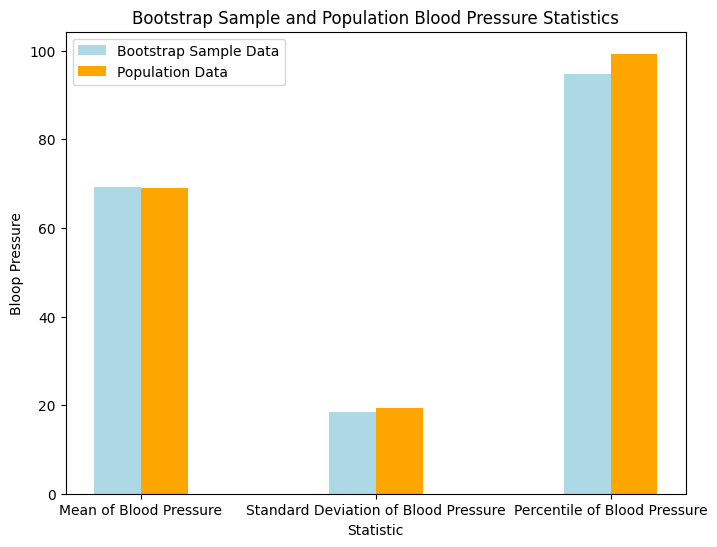

In [76]:
labels = ['Mean of Blood Pressure', 'Standard Deviation of Blood Pressure','Percentile of Blood Pressure']
bootstrap_sample_values = [average_mean,average_std,average_percentile]
population_values = [data['BloodPressure'].describe()['mean'],data['BloodPressure'].describe()['std'],data['BloodPressure'].describe(percentiles=[.98])['98%']]

plt.figure(figsize=(8, 6))

x = np.arange(len(labels))
width = 0.2

plt.bar(x - width/2, bootstrap_sample_values, width, label='Bootstrap Sample Data', color='lightblue')
plt.bar(x + width/2, population_values, width, label='Population Data', color='orange')
plt.xticks(x, labels)

plt.xlabel('Statistic')
plt.ylabel('Bloop Pressure')
plt.title('Bootstrap Sample and Population Blood Pressure Statistics')
plt.legend()